In [1]:
from DataScienceBowl import DataScienceBowl

In [2]:
# Tutorial based on https://learnopencv.com/pytorch-for-beginners-semantic-segmentation-using-torchvision/

from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

100% [............................................................................] 182965 / 182965

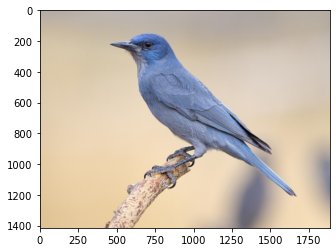

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import wget

wget.download("https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg", 'bird.jpg')
img = Image.open('bird.jpg')

plt.imshow(img)
plt.show()

In [16]:
# Transformation
import torchvision.transforms as T

trf = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

# dataset = DataScienceBowl('data/data_science_train', T.Resize(256))

# inp = dataset[0]['image'].unsqueeze(0)

In [20]:
out = fcn(img)['out']
# print(img.shape)
# print(out.shape)

AttributeError: shape

In [6]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print(om.shape)
print(np.unique(om))


(256, 256)
[ 0 15]


In [7]:
def decode_segmap(image, nc=21):
    
    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    
    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
        
    rgb = np.stack([r, g, b], axis=2)
    return rgb

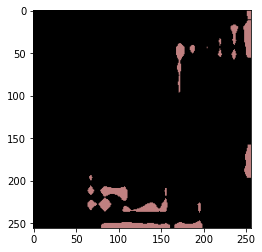

In [8]:
rgb = decode_segmap(om)

plt.imshow(rgb)
plt.show()

In [44]:
def segment(net, path):
    img = Image.open(path)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    trf = T.Compose([
        T.Resize(256),
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
    ])
    
    inp = trf(img).unsqueeze(0)
    out = net(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    
    print(np.unique(om))
    
    rgb = decode_segmap(om)
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()

100% [............................................................................] 110531 / 110531

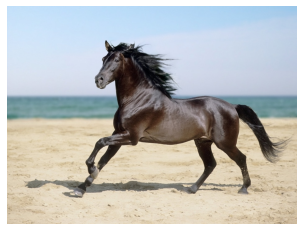

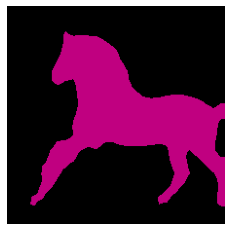

In [42]:
wget.download("https://images.photowall.com/products/51768/beach-horse.jpg?h=699&q=85", 'horse.jpg')
segment(fcn, 'horse.jpg')


100% [..............................................................................] 82100 / 82100

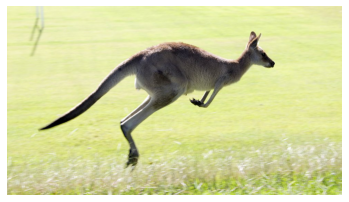

[ 0  8 12]


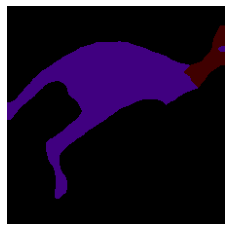

In [45]:
url = "https://c.files.bbci.co.uk/A6CA/production/_103589624_011717548.jpg"
file = 'kangaroo.jpg'
wget.download(url, file)
segment(fcn, file)


100% [..............................................................................] 80684 / 80684

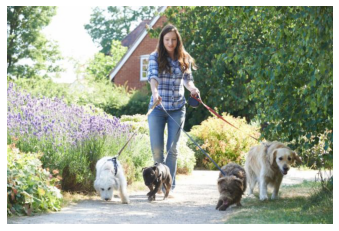

[ 0 12 15]


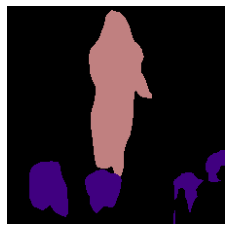

In [57]:
url = "https://i1.wp.com/www.justgetblogging.com/wp-content/uploads/2019/09/dog-walking-service-app-e1572936919815.jpg?fit=640%2C428&ssl=1"
file = 'scene.jpg'
wget.download(url, file)
segment(fcn, file)

In [58]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()
segment(dlab, 'C:\Users\Harm\Documents\Uni\MasterThesis\MscThesis\data\data_science_train\00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e\images\00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-58-6218183f7b8e>, line 2)